In [68]:

import pandas as pd
import numpy as np
import nltk
nltk.download('omw-1.4')
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
import csv

In [70]:
data = pd.read_csv("IMDB Dataset.csv")

In [71]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [72]:
data.sample(19)

,review,sentiment
44084,Humphrey Bogart in his first starring role loo...,positive
7419,A group of heirs to a mysterious old mansion f...,negative
806,Most people are totally unaware that this movi...,positive
45352,When something can be anything you want it to ...,negative
11313,someone needed to make a car payment... this i...,negative
22556,I've just seen it....for those who don't know ...,positive
43959,... than this ;-) What would happen if Terry G...,positive
37348,"One of the unsung gems of the 1980's, Scenes.....",positive
34189,When Kristy Swanson gets an attack of the guil...,negative
1242,I had high hopes for this movie. The theater m...,negative


In [73]:
data.shape

(50000, 2)

In [74]:
data.iloc[1]

review       A wonderful little production. <br /><br />The...
sentiment                                             positive
Name: 1, dtype: object

In [75]:
data.iloc[1,0]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [76]:
data.iloc[1][1]

'positive'

#The pre-processing tasks we perform


*   Converting the text to lowercase
*   Removing Emails
*   Removing HTML Tags
*   Removing Stop Words
*   Lemmatization





In [77]:
# Converting the text to lowercase
data['review'] = data['review'].apply(lambda x: str(x).lower())

In [78]:
data['review'][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [79]:
#Removing Emails
def remove_emails(x):
    email_pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)")
    return re.sub(email_pattern, '', x)

In [80]:
data['review'] = data['review'].apply(remove_emails)

In [81]:
data['review'][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [82]:
data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [83]:
#Removing HTML Tags

def remove_html_tags(x):

    content = BeautifulSoup(x, 'html.parser').get_text().strip()

    return content

In [84]:
data['review'] = data['review'].apply(remove_html_tags)

c:\Users\danie\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [85]:
# Original Sentence

data['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [86]:
#Removing Stop Words
def remove_stop_words(x):
    stop_words = set(stopwords.words("english"))
    return ' '.join([word for word in x.split() if word not in stop_words])

In [87]:
#lemmatization
lemmatizer = WordNetLemmatizer()
def lemma(x):
    content = ' '.join([lemmatizer.lemmatize(word) for word in x.split(" ")])
    return content

In [88]:
data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [89]:
data['review'] = data['review'].apply(lemma) 

In [90]:
data['review'] = data['review'].apply(remove_stop_words)

In [91]:
# Remove Stopwords

data['review'][2]

'thought wa wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty character likable (even well bread suspected serial killer). may disappointed realize match point 2: risk addiction, thought wa proof woody allen still fully control style many u grown love.this wa i\'d laughed one woody\'s comedy year (dare say decade?). i\'ve never impressed scarlet johanson, managed tone "sexy" image jumped right average, spirited young woman.this may crown jewel career, wa wittier "devil wear prada" interesting "superman" great comedy go see friends.'

Second review - data['review'][2]:

Stopwords  -> Lemma

'thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty character likable (even well bread suspected serial killer). may disappointed realize match point 2: risk addiction, thought proof woody allen still fully control style many u grown love.this i\'d laughed one woody\'s comedy year (dare say decade?). i\'ve never impressed scarlet johanson, managed tone "sexy" image jumped right average, spirited young woman.this may crown jewel career, wittier "devil wear prada" interesting "superman" great comedy go see friends.'


Lemma -> Stopwords

'thought wa wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty character likable (even well bread suspected serial killer). may disappointed realize match point 2: risk addiction, thought wa proof woody allen still fully control style many u grown love.this wa i\'d laughed one woody\'s comedy year (dare say decade?). i\'ve never impressed scarlet johanson, managed tone "sexy" image jumped right average, spirited young woman.this may crown jewel career, wa wittier "devil wear prada" interesting "superman" great comedy go see friends.'


#**Assignment**

Can there be a difference in change the order of performing lemmatization and stopword removal?

Yes but in our example it is just a very small one. When we first use lemmatization and then remove stopwords the "wa" will be in the text and will not be removed.



In [92]:
X = data['review']
y = data['sentiment']

In [93]:
#Converting the Data into Vector using tfidf
'''
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)'''

'\ntfidf = TfidfVectorizer()\nX = tfidf.fit_transform(X)'

In [94]:
#Converting the Data into Vector using bag-of-words
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [96]:
classifier = LogisticRegression()
classifier.fit(vectorizer.transform(X_train), y_train)


c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_test_pred = classifier.predict(vectorizer.transform(X_test))

In [98]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5015
    positive       0.88      0.89      0.89      4985

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [99]:
confusion_matrix(y_test, y_test_pred)

array([[4417,  598],
       [ 536, 4449]], dtype=int64)

In [100]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

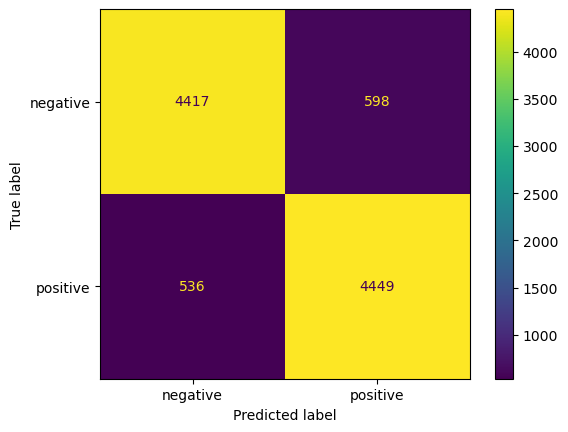

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

Positive Words


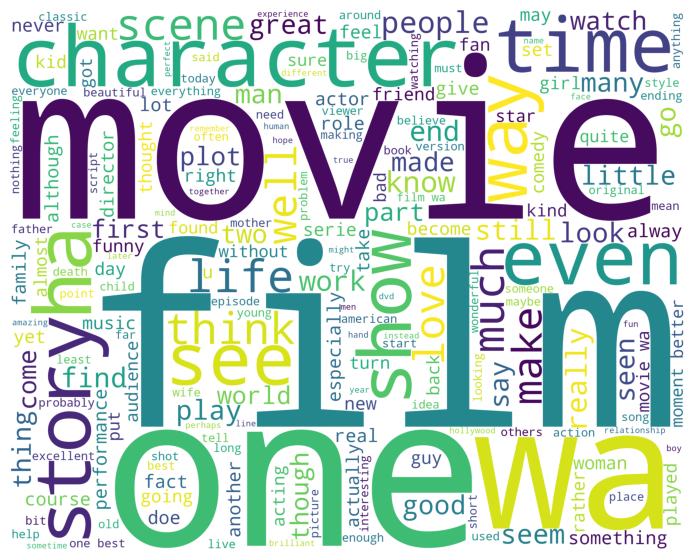

Negative Words


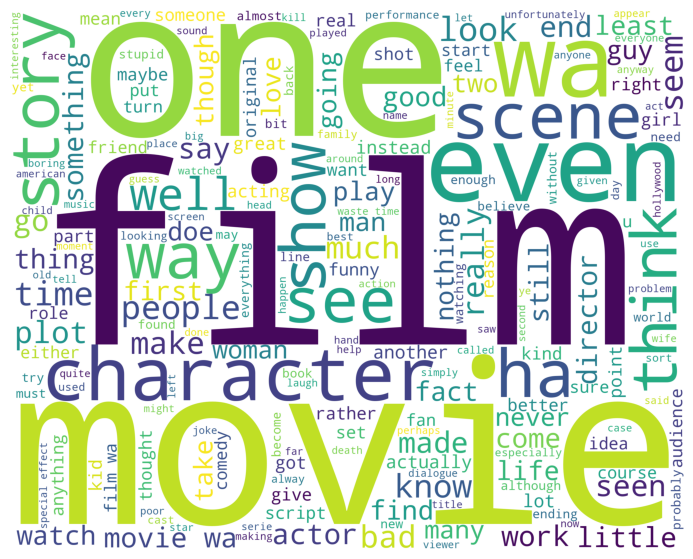

In [102]:
from wordcloud import WordCloud
positivedata = data[data['sentiment'] == "positive"]
positivedata =positivedata['review']
negdata = data[data['sentiment'] == "negative"]
negdata= negdata['review']
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive Words")
wordcloud_draw(positivedata)
print("Negative Words")
wordcloud_draw(negdata)

[Visualize features](https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html#Load-the-IMDB-dataset)

# Tokenize the reviews

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('omw-1.4')
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the preprocessed IMDB dataset
data = pd.read_csv("IMDB Dataset Preprocessed.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Load the pre-trained word embeddings
word2vec_model = Word2Vec.load("word2vec.model")

# Define a function to convert a review to a feature vector
def review_to_feature_vector(review):
    words = review.split()
    feature_vector = np.zeros((100,), dtype="float32")
    n_words = 0
    for word in words:
        if word in word2vec_model:
            feature_vector = np.add(feature_vector, word2vec_model[word])
            n_words += 1
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Convert the reviews to feature vectors
X_train = np.array([review_to_feature_vector(review) for review in X_train])
X_test = np.array([review_to_feature_vector(review) for review in X_test])

# Train a random forest classifier on the training data
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the random forest classifier on the testing data
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test, y_test_pred))


In [103]:


# Train a logistic regression model on the training data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the logistic regression model on the testing data
y_test_pred = classifier.predict(X_test)

ValueError: could not convert string to float: 'documentary explores story covered pilger\'s latest book "freedom next time", wa published 2006. reveals shocking expulsion native diego garcia, one chagos island indian ocean.the islander technically british citizens, diego garcia british colony, much like mauritius, nearby island native exiled, used be. british government ha ignored plea return homeland, island military base united state army, used basis bombing iraq afghanistan.as usual, pilger\'s coverage shocking, especially document treatment current impoverished living condition surviving islanders. interview round excellent, cornering parliament representative us government\'s information pin down, rank one best.pilger also us dramatic reconstruction dissect series recently released document fully illuminate british conspiracy evict natives. weaving footage interviews, islander music, really heightens film\'s impact.it easy viewing, "stealing nation" john pilger best. recommended.'

# Training of CBOW Model

In [ ]:
# Tokenize the preprocessed text
tokenized_text = [review.split() for review in data['review']]

# Train a Word2Vec model on the tokenized text
model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, sg=0)

# Convert the tokenized text to vectors using the trained Word2Vec model
X = np.array([np.mean([model.wv[word] for word in review], axis=0) for review in tokenized_text])


# Logistic Regression


In [ ]:

# Train a logistic regression model on the training data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the logistic regression model on the testing data
y_test_pred = classifier.predict(X_test)



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Training of Skip 2 Gram Model

In [ ]:
model = Word2Vec(X_train, vector_size=100, window=5, min_count=1, sg=0)

# Training the model
model.train(X_train, total_examples=model.corpus_count, epochs=10)

# Evaluation of Models

In [ ]:
def evaluation(y_test, y_pred):
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Display the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

evaluation(y_test, y_pred)